# K-Prototype Clustering

**About Blood Transfusion dataset**<br><br>
To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build a FRMTC model, we selected 748 donors at random from the donor database. These 748 donor data, each one included R (Recency - months since last donation), F (Frequency - total number of donation), M (Monetary - total blood donated in c.c.), T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).

**Attribute Information:**

- R (Recency - months since last donation), 
- F (Frequency - total number of donation), 
- M (Monetary - total blood donated in c.c.), 
- T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood). 

- Variable	Data Type	Measurement	Description	min	max	mean	std 
- Recency quantitative	Months	Input	0.03	74.4	9.74	8.07 
- Frequency quantitative	Times	Input	1	50	5.51	5.84 
- Monetary	quantitative	c.c. blood	Input	250	12500	1378.68	1459.83 
- Time quantitative	Months	Input	2.27	98.3	34.42	24.32 
- Whether he/she donated blood in March 2007	binary	1=yes 0=no	Output	0	1	1 (24%) 0 (76%) 

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
help(KPrototypes)

Help on class KPrototypes in module kmodes.kprototypes:

class KPrototypes(kmodes.kmodes.KModes)
 |  KPrototypes(n_clusters=8, max_iter=100, num_dissim=<function euclidean_dissim at 0xa14221f28>, cat_dissim=<function matching_dissim at 0xa14221e18>, init='Huang', n_init=10, gamma=None, verbose=0, random_state=None, n_jobs=1)
 |  
 |  k-protoypes clustering algorithm for mixed numerical/categorical data.
 |  
 |  Parameters
 |  -----------
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  max_iter : int, default: 300
 |      Maximum number of iterations of the k-modes algorithm for a
 |      single run.
 |  
 |  num_dissim : func, default: euclidian_dissim
 |      Dissimilarity function used by the algorithm for numerical variables.
 |      Defaults to the Euclidian dissimilarity function.
 |  
 |  cat_dissim : func, default: matching_dissim
 |      Dissimilarity function used by the kmodes 

In [3]:
# Reading Dataset
blood = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data', sep=",",engine = 'python')

In [4]:
#Sanity Check
blood.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
# standardizing data
columns_to_normalize     = ['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']
blood[columns_to_normalize] = blood[columns_to_normalize].apply(lambda x: (x - x.mean()) / np.std(x))

In [6]:
# Re-check after standardizing data
blood.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,-0.927899,7.623346,7.623346,2.615633,1
1,-1.175118,1.282738,1.282738,-0.257881,1
2,-1.051508,1.796842,1.796842,0.029471,1
3,-0.927899,2.482313,2.482313,0.439973,1
4,-1.051508,3.167784,3.167784,1.753579,0


In [10]:
# Converting the dataset into matrix
blood_matrix = blood.as_matrix()

/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [12]:
# Martix for analysis
blood_matrix

array([[-0.92789873,  7.62334626,  7.62334626,  2.61563344,  1.        ],
       [-1.17511806,  1.28273826,  1.28273826, -0.2578809 ,  1.        ],
       [-1.0515084 ,  1.79684161,  1.79684161,  0.02947053,  1.        ],
       ...,
       [ 1.66790417, -0.43093957, -0.43093957,  1.13782607,  0.        ],
       [ 3.64565877, -0.77367514, -0.77367514,  0.19367135,  0.        ],
       [ 7.72477762, -0.77367514, -0.77367514,  1.54832812,  0.        ]])

In [13]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(blood_matrix, categorical=[4])

In [14]:
kproto.cluster_centroids_

[array([[-0.64668675, -0.52090766, -0.52090766, -0.90254016],
        [-0.2712224 ,  1.63832641,  1.63832641,  1.42312499],
        [ 1.16746505, -0.50664088, -0.50664088, -0.18036377],
        [-0.27750397,  0.23130882,  0.23130882,  0.56235591],
        [-0.52616733,  6.10245718,  6.10245718,  2.44630135]]), array([[0.],
        [0.],
        [0.],
        [0.],
        [1.]])]

In [15]:
# Checking the cost of the clusters created.
kproto.cost_

909.3070990110788

In [16]:
# Adding the predicted clusters to the main dataset
blood['cluster_id'] = clusters

In [17]:
# Re-check
blood.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007,cluster_id
0,-0.927899,7.623346,7.623346,2.615633,1,4
1,-1.175118,1.282738,1.282738,-0.257881,1,3
2,-1.051508,1.796842,1.796842,0.029471,1,1
3,-0.927899,2.482313,2.482313,0.439973,1,1
4,-1.051508,3.167784,3.167784,1.753579,0,1


In [19]:
# Checking the clusters created
blooddf = pd.DataFrame(blood['cluster_id'].value_counts())
blooddf

,cluster_id
0,240
3,214
2,206
1,80
4,8


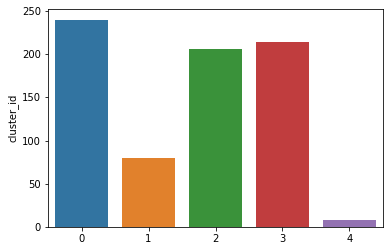

In [20]:
sns.barplot(x=blooddf.index, y=blooddf['cluster_id'])

In [21]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,14)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(blood_matrix, categorical=[4])
    cost.append(kproto.cost_)
    
plt.plot(cost)

ValueError: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.